# Diabetes Prediction Using SVM Model

## importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


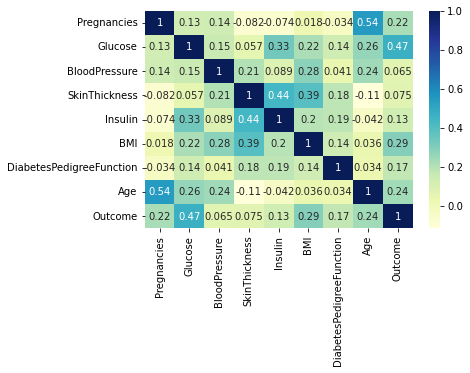

In [41]:
# Testing for the correlataion between the dataset features. 
sns.heatmap(data=df.corr(),cmap="YlGnBu", annot=True)
plt.show()

## EDA PERFORMANCE

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Splitting the columns into X and Y Variables for the model building process.

In [8]:
X = df.drop("Outcome", axis=1)
y= df["Outcome"]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
# As the scale of all the column values are not in same scale. So we need to Standardize the values to one scale.
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
#fitting the attribute dataset to the scaling library.
sc.fit(X)

StandardScaler()

In [14]:
#transforming the datsets into scaled arrays  
X = sc.transform(X)

In [15]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting the dataset into Training and Testing Dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
X_train

array([[-0.54791859, -0.8730192 , -0.26394125, ...,  0.76245745,
         0.61043756, -0.87137393],
       [ 0.04601433,  1.97502103,  0.45982725, ...,  0.63553821,
        -0.6278111 , -0.19067191],
       [-0.54791859,  0.12848945, -0.47073225, ...,  0.22939662,
        -1.15935199, -0.19067191],
       ...,
       [-0.84488505, -0.05929342, -1.29789624, ...,  0.44515934,
        -0.5794892 , -0.70119842],
       [ 0.3429808 , -0.184482  ,  0.35643175, ..., -0.10059342,
        -0.38922173,  0.91546889],
       [ 1.53084665,  0.28497518,  0.04624525, ...,  0.28016432,
         0.54399494,  1.00055664]])

In [20]:
y_train

709    1
425    1
135    0
630    1
500    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 614, dtype: int64

In [21]:
X_test

array([[-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.25095213,  2.06891246,  0.04624525, ...,  0.55938666,
        -0.19291401,  0.23476686],
       [ 0.93691372, -0.46615631,  1.18359575, ..., -1.179407  ,
        -0.71539454,  1.2558199 ],
       ...,
       [ 0.63994726,  0.41016376,  0.04624525, ...,  0.43246741,
         0.21178189, -0.36084741],
       [ 1.82781311, -1.65544783,  1.90736425, ...,  0.44515934,
        -0.56438861,  1.17073215],
       [ 3.01567896, -0.65393918,  0.45982725, ...,  0.58477051,
        -0.18083354,  1.08564439]])

In [22]:
y_test

766    1
748    1
42     0
485    1
543    0
      ..
603    1
510    1
171    1
672    0
298    1
Name: Outcome, Length: 154, dtype: int64

In [23]:
X_train.shape

(614, 8)

In [24]:
X_test.shape

(154, 8)

In [25]:
y_train.shape

(614,)

In [26]:
y_test.shape

(154,)

## Model Building 

In [27]:
from sklearn import svm

In [28]:
#attaining a variable to the model 
classifier = svm.SVC(kernel='linear')

In [29]:
#fitting the training dataset into model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
#predicting the output for the training dataset
X_train_pred = classifier.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
#Calculating how accurate the model is built according to the actual datset 
X_train_accuracy = accuracy_score(X_train_pred, y_train)

In [33]:
print("The Training model Prediction is :", round(X_train_accuracy *100,2), "%")

The Training model Prediction is : 77.85 %


In [34]:
#Now modelling the same with the Test Datastet
X_test_pred = classifier.predict(X_test)

In [35]:
#Calculating how accurate the model is built according to the actual datset
X_test_accuracy = accuracy_score(X_test_pred, y_test)

In [36]:
print("The Testing model Prediction is :", round(X_test_accuracy *100,2), "%")

The Testing model Prediction is : 77.27 %


## Manual Prediction 

In [37]:
input_data = (2,197,70,45,543,30.5,0.158,53)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = sc.transform(input_data_reshaped)

std_data

prediction = classifier.predict(std_data)

print(prediction)

if (prediction ==1):
    print("The person is a Diabetic")
else:
    print("the person is not a Diabetic")


[1]
The person is a Diabetic


## Thus the SVM Model for detecting any Diabetic Patient is Ready and accurate. 